In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Raw data of city csv
filepath = os.path.join("raw_data/city_data.csv")
city_raw_df = pd.read_csv(filepath, low_memory="false")
# raw data of ride csv
filepath2 = os.path.join("raw_data/ride_data.csv")
ride_raw_df = pd.read_csv(filepath2, low_memory="false")
# merged to raw data tables
merged = pd.merge(city_raw_df, ride_raw_df, on="city")

In [3]:
#  Created new table to add oolumn for color reference for type of city so that able to
#  complete scatter due to inability to set color after setting up inital plot in firt trial
color_df = pd.DataFrame({"type": ["Urban", "Suburban", "Rural"],
                         "color ref": ["gold", "lightskyblue", "lightcoral"]})
# merge color_df with merged
merged_with_colorref = pd.merge(merged, color_df, on="type")
merged_with_colorref.head()

,city,driver_count,type,date,fare,ride_id,color ref
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795,gold
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333,gold
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736,gold
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309,gold
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829,gold


## Final table used to create scatter plot

In [4]:
# group by city, drive_count, type, and aggregate date, fare
grouped = merged_with_colorref.groupby(["city", "driver_count", "type", "color ref"]).agg({
    "date": "count", "fare": "mean"}).reset_index()
grouped = grouped.rename(columns={"date": "No. of rides", "fare": "Avg Fare"})
grouped = pd.DataFrame(grouped)
grouped = grouped.round(2)
grouped.head()

,city,driver_count,type,color ref,No. of rides,Avg Fare
0,Alvarezhaven,21,Urban,gold,31,23.93
1,Alyssaberg,67,Urban,gold,26,20.61
2,Anitamouth,16,Suburban,lightskyblue,9,37.32
3,Antoniomouth,21,Urban,gold,22,23.62
4,Aprilchester,49,Urban,gold,19,21.98


In [5]:
plt.scatter(grouped["No. of rides"], grouped["Avg Fare"],
            s=grouped["driver_count"], c=grouped["color ref"])
# plt.show()

In [6]:
# tick marks x axis
x_axis = np.arange(0, grouped["No. of rides"].max() + 10, 5)
x_axis

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40])

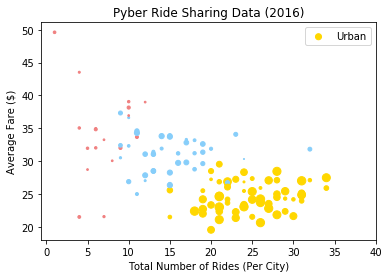

In [7]:
# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.xticks(x_axis)

plt.legend(grouped["type"], loc="best")


plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
# plt.text(35,38,"Note)

# Print our chart to the screen
plt.show()

# Total fares by city type

In [8]:
#% of Total Fares by City Type
pie_fare = merged.groupby("type").agg({"fare": "sum"})

percent_fare = pie_fare["fare"]/pie_fare["fare"].sum()
pie_fare["percent"] = percent_fare
pie_fare

,fare,percent
type,,
Rural,4255.09,0.065798
Suburban,20335.69,0.314458
Urban,40078.34,0.619745


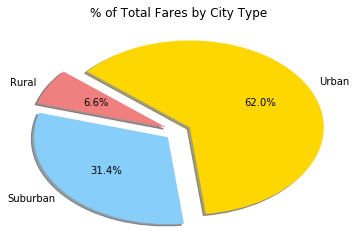

In [9]:
labels = ["Rural", "Suburban", "Urban"]
size = pie_fare["percent"]
color = ["lightcoral", "lightskyblue", "gold"]
explode = [0.1, 0.1, 0.1]
plt.pie(size, explode=explode, labels=labels, colors=color,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
plt.show()

# Total rides by city type

In [10]:
#% of Total Rides by City Type
pie_rides = grouped.groupby("type").agg({"No. of rides": "sum"})
total_rides = pie_rides["No. of rides"]/pie_rides["No. of rides"].sum()
pie_rides["Total Rides"] = total_rides

pie_rides

,No. of rides,Total Rides
type,,
Rural,125,0.051932
Suburban,657,0.272954
Urban,1625,0.675114


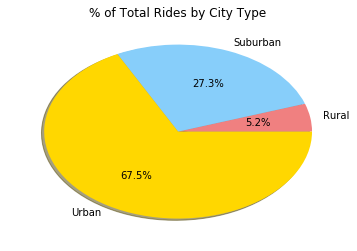

In [11]:
labels = ["Rural", "Suburban", "Urban"]
size = pie_rides["Total Rides"]
color = ["lightcoral", "lightskyblue", "gold"]
explode = [0, 0, 0]
plt.pie(size, explode=explode, labels=labels, colors=color,
        autopct="%1.1f%%", shadow=True, startangle=360)
plt.title("% of Total Rides by City Type")
plt.show()

# Total Drivers by city type

In [12]:
#% of Total Drivers by City Type
pie_drivers = grouped.groupby("type").agg({"driver_count": "sum"})
pie_drivers
total_drivers = pie_drivers["driver_count"]/pie_drivers["driver_count"].sum()
pie_drivers["Total Drivers"] = total_drivers
pie_drivers

,driver_count,Total Drivers
type,,
Rural,104,0.031054
Suburban,638,0.190505
Urban,2607,0.778441


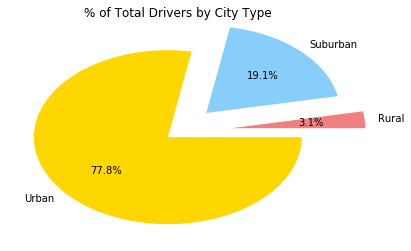

In [13]:
labels = ["Rural", "Suburban", "Urban"]
size = pie_drivers["Total Drivers"]
color = ["lightcoral", "lightskyblue", "gold"]
explode = [0.4, 0.3, 0.1]
plt.pie(size, explode=explode, labels=labels, colors=color,
        autopct="%1.1f%%", shadow=False, startangle=360)
plt.title("% of Total Drivers by City Type")
plt.show()